In [1]:
####################### You have to run this cell #######################

% load_ext autoreload
% autoreload 2
import sys, os
import os
cwd = os.getcwd()
path = os.path.join(cwd, os.pardir)
sys.path.append(path)


In [2]:
%matplotlib inline

# Put all imports below

In [3]:
from models import User,Test,Payments,UserRoles,Role,College,CollegeTest,QuestionAttempt,SectionAttempt,TestAttempt,Question,Choice,Section
from models.Package import PackageTypes
from app import create_app
from extensions import db
from sqlalchemy import and_,outerjoin,or_
from sqlalchemy.orm import contains_eager, joinedload,load_only
from pprint import pprint
import urllib.request
from bs4.element import Comment
import pandas as pd
from bs4 import BeautifulSoup


In [4]:
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen('http://www.nytimes.com/2009/12/21/us/21storm.html').read()

In [4]:
app = create_app('./configs/prod.py')
app.app_context().push()

/Users/harshvardhangupta/.virtualenvs/beatest-flask-rest-backend/lib/python3.6/site-packages/flask_caching/__init__.py:188: UserWarning: Flask-Cache: CACHE_TYPE is set to null, caching is effectively disabled.
  warnings.warn("Flask-Cache: CACHE_TYPE is set to null, "


In [14]:
all_questions = Question.query.options(load_only(Question.html,Question.rc_passage)).filter(Question.type=="RC").all()

In [15]:
import re

def remove_html_tags(data):
    if data == None:
        return ""
    soup = BeautifulSoup(data)
    all_text = ''.join(soup.findAll(text=True))
    return all_text


In [16]:
# all_questions = Question.query.options(load_only(Question.html,Question.rc_passage)).all()

In [17]:
all_htmls = [text_from_html(q.html) if q.html else ""  for q in all_questions ]
all_rc = [text_from_html(q.rc_passage) if q.rc_passage else "" for q in all_questions ]

In [21]:
summed = [len(html)+len(rc) for html,rc in zip(all_htmls,all_rc)]

In [ ]:
filtered = list(filter(lambda x : x>0,summed))

In [ ]:
max(filtered)

In [ ]:
len(filtered)

In [ ]:
np.argmax(np.array(summed))

In [ ]:
all_htmls[864],all_rc[864]

In [ ]:
all_htmls[381]

In [ ]:
all_rc[381]

In [ ]:
len(all_rc[381])

In [ ]:
all_rc[381]

In [22]:
df = pd.DataFrame(summed)

In [23]:
df.describe()

,0
count,2938.000000
mean,1242.168142
std,1555.596410
min,0.000000
25%,345.000000
50%,740.000000
75%,1176.000000
max,7463.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a842160>]],
      dtype=object)

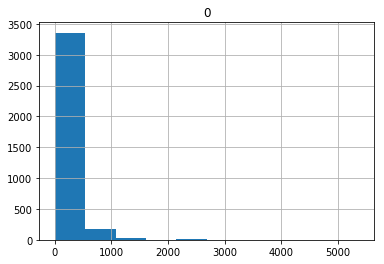

In [12]:
df.hist()

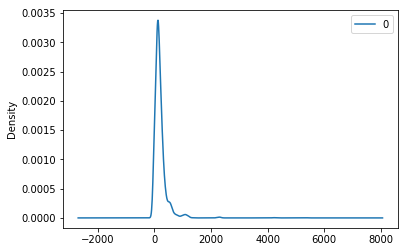

In [13]:
df.plot.density()

In [ ]:
all_htmls

In [ ]:
len(all_htmls)

In [ ]:
len(all_questions)

In [ ]:
all_questions[2]

In [ ]:
from BeautifulSoup4 import beautifulsoup4


In [ ]:
remove_html_tags(all_questions[0].html)

In [ ]:
all_questions[0].html

In [8]:
q = Question.query.get(1)
q

Question({
    "id": 1,
    "points_correct": 1.0,
    "points_wrong": -91.0,
    "spelling_penalty": null,
    "tita_answer": null,
    "topic": "Simplifications",
    "type": "MCQ"
})

In [9]:
q.html

'<p style="margin-left:0in"><span style="font-family:Calibri; font-size:16pt">Directions: What approximate value will come in place of the question mark (?) in the following questions</span></p>\r\n\r\n<p style="margin-left:0in"><!-- [if gte msEquation 12]><m:oMathPara><m:oMathParaPr><m:jc\r\n   m:val="centerGroup"></m:jc></m:oMathParaPr><m:oMath><m:r><span\r\n   style=\'font-size:18.0pt;font-family:"Cambria Math";mso-ascii-font-family:\r\n   "Cambria Math";mso-fareast-font-family:+mn-ea;mso-bidi-font-family:+mn-cs;\r\n   mso-fareast-theme-font:minor-fareast;mso-bidi-theme-font:minor-bidi;\r\n   color:black;mso-color-index:1;mso-font-kerning:12.0pt;language:en-IN;\r\n   font-weight:normal;font-style:italic;mso-style-textfill-type:solid;\r\n   mso-style-textfill-fill-themecolor:text1;mso-style-textfill-fill-color:black;\r\n   mso-style-textfill-fill-alpha:100.0%\'>76%&nbsp;</span></m:r><m:r><span\r\n   style=\'font-size:18.0pt;font-family:"Cambria Math";mso-ascii-font-family:\r\n   "Cam

In [10]:
q

Question({
    "html": "<p style=\"margin-left:0in\"><span style=\"font-family:Calibri; font-size:16pt\">Directions: What approximate value will come in place of the question mark (?) in the following questions</span></p>\r\n\r\n<p style=\"margin-left:0in\"><!-- [if gte msEquation 12]><m:oMathPara><m:oMathParaPr><m:jc\r\n   m:val=\"centerGroup\"></m:jc></m:oMathParaPr><m:oMath><m:r><span\r\n   style='font-size:18.0pt;font-family:\"Cambria Math\";mso-ascii-font-family:\r\n   \"Cambria Math\";mso-fareast-font-family:+mn-ea;mso-bidi-font-family:+mn-cs;\r\n   mso-fareast-theme-font:minor-fareast;mso-bidi-theme-font:minor-bidi;\r\n   color:black;mso-color-index:1;mso-font-kerning:12.0pt;language:en-IN;\r\n   font-weight:normal;font-style:italic;mso-style-textfill-type:solid;\r\n   mso-style-textfill-fill-themecolor:text1;mso-style-textfill-fill-color:black;\r\n   mso-style-textfill-fill-alpha:100.0%'>76%&nbsp;</span></m:r><m:r><span\r\n   style='font-size:18.0pt;font-family:\"Cambria Math\"